In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb  
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split  #分割数据集
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error   #模型评价
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv('E.csv')

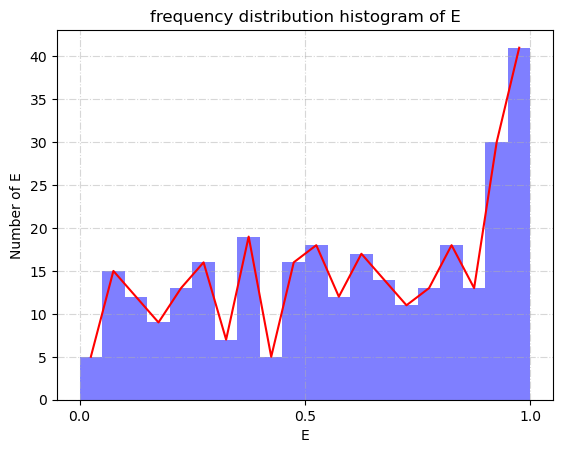

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure() #初始化一张图

width = 20
n, bins, patches = plt.hist(y,bins = width,range=(0,1),color='blue',alpha=0.5)
#print(n)
#print(bins)
#print(patches)
plt.grid(alpha=0.5,linestyle='-.') #网格线，更好看 
plt.xlabel('E')  
plt.ylabel('Number of E')  
plt.title(r'frequency distribution histogram of E') #+citys[i])  
plt.xticks(np.arange(0,width,0.5))
plt.plot(bins[0:width]+((bins[1]-bins[0])/2.0),n,color='red')#利用返回值来绘制区间中点连线
plt.show()
plt.savefig('a.png')

In [2]:
df=df.drop(['Unnamed: 0'],axis=1)
df
X=df.iloc[:,0:60]
y=df.iloc[:,60]
X=X.values
y=y.values.ravel()

In [3]:
df

,pieceVSA_EState6,pieceBCUT2D_MRHI,ex1EState_VSA8,pieceEState_VSA6,piecePEOE_VSA10,piecefr_C_O_noCOO,pieceSlogP_VSA5,pieceBertzCT,pieceEState_VSA1,ex1qed,...,pieceVSA_EState5,piecePEOE_VSA8,pieceBCUT2D_CHGHI,Hs_wt,extender2_ratio,prePEOE_VSA8,extender1_ratio,self_time,self_tem,E1
0,-2.905558,5.891474,9.967957,48.466160,63.554242,16,965.920519,15059.28394,191.185750,0.539835,...,-0.117581,136.049180,2.705260,0.380329,0.000000,25.173194,0.250000,10.0,80,0.250000
1,12.904136,5.917920,9.967957,48.590095,63.554242,16,965.790042,15448.18231,156.578907,0.539835,...,-0.058599,136.793423,2.706373,0.384440,0.062500,25.173194,0.187500,10.0,80,0.660000
2,12.904136,5.917920,9.967957,48.590095,63.554242,16,965.790042,15448.18231,156.578907,0.539835,...,-0.058599,136.793423,2.706373,0.388497,0.125000,25.173194,0.125000,10.0,70,0.700000
3,12.904136,5.917920,9.967957,48.590095,63.554242,16,965.790042,15448.18231,156.578907,0.539835,...,-0.058599,136.793423,2.706373,0.388497,0.125000,25.173194,0.125000,1.0,80,0.360000
4,12.904136,5.917920,9.967957,48.590095,63.554242,16,965.790042,15448.18231,156.578907,0.539835,...,-0.058599,136.793423,2.706373,0.388497,0.125000,25.173194,0.125000,5.0,80,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,14.261663,8.763727,0.000000,28.635468,0.000000,16,2195.149326,18783.92166,79.212121,0.642794,...,0.000000,1978.833139,2.905777,0.363672,0.160710,395.158585,0.160714,3.0,70,0.792453
300,14.261663,8.763727,0.000000,28.635468,0.000000,16,2195.149326,18783.92166,79.212121,0.642794,...,0.000000,1978.833139,2.905777,0.333877,0.163934,395.158585,0.163934,0.5,70,0.391304
301,14.261663,8.763727,0.000000,28.635468,0.000000,16,2195.149326,18783.92166,79.212121,0.642794,...,0.000000,1978.833139,2.905777,0.333877,0.163934,395.158585,0.163934,1.0,70,0.469565
302,14.261663,8.763727,0.000000,28.635468,0.000000,16,2195.149326,18783.92166,79.212121,0.642794,...,0.000000,1978.833139,2.905777,0.333877,0.163934,395.158585,0.163934,2.0,70,0.556522


MSE_train: 0.0013034179933980028 
 MSE_test 0.015340937737545003
MAE_train: 0.009293465160317987 
 MAE_test 0.08554939139687891
R^2_train: 0.9853830372714872 
 R^2_test1: 0.842928243806409


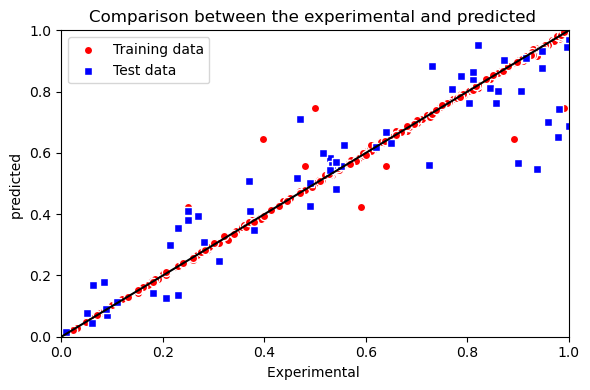

In [10]:
import xgboost as xgb
X_train,X_test= train_test_split(X, test_size=0.2,random_state = 6)
y_train,y_test = train_test_split(y, test_size=0.2,random_state = 6)

#print('X_train shape',X_train.shape,'X_test. shape',X_test.shape)
#print('y_train shape',y_train.shape,'y_test shape',y_test.shape)

from sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
model=xgb.XGBRegressor(random_state=0,n_estimators=87,max_depth =6,gamma=0.00001)
model.fit(X_train_std,y_train)
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)
score=r2_score(y_test,y_test_pred)
y_train_pred = model.predict(X_train_std) #预测训练集
y_test_pred= model.predict(X_test_std)   #预测测试集
MSE_train = mean_squared_error(y_train,y_train_pred) 
MSE_test = mean_squared_error(y_test,y_test_pred)
MAE_train = mean_absolute_error(y_train,y_train_pred) 
MAE_test= mean_absolute_error(y_test,y_test_pred)
print('MSE_train:',MSE_train,'\n','MSE_test',MSE_test) 
print('MAE_train:',MAE_train,'\n','MAE_test',MAE_test)
print("R^2_train:",r2_score(y_train,y_train_pred),'\n',"R^2_test1:",r2_score(y_test,y_test_pred))
#真实值预测值平面散点图
plt.figure(figsize=(6,4)) # 指定图片的尺寸
plt.scatter(y_train,y_train_pred,color='red',marker='o',edgecolor='white',label ='Training data') #残差散点图，指定散点的颜色，标记(o为圆圈s为方块)，标签等设定
plt.scatter(y_test,y_test_pred,color='blue',marker='s',edgecolor='white',label ='Test data')
plt.ylabel('predicted ')
plt.xlabel('Experimental ')
plt.title('Comparison between the experimental and predicted ')
plt.legend(loc = 'upper left') #图例位置
plt.plot([0, 1], [0, 1],c='black')
plt.xlim([0,1]) # 设定x轴范围
plt.ylim(0,1)
plt.tight_layout() #自动调整子图参数，使之填充整个图像区域，可用于检查坐标轴标签、刻度标签以及标题的部分
#plt.savefig("C:\Users\Administrator\Desktop\test\ILCO2_SVM_pred.png")     #图片保存
plt.show()

In [12]:
test=pd.read_csv('460E.csv')

XTEST=test.iloc[:,0:60]
XTEST
XTEST=XTEST.values
#sc = StandardScaler()
XTEST = sc.transform(XTEST)
ypre=model.predict(XTEST)
test['preXGB']=pd.DataFrame(ypre)
#ypre=pd.DataFrame(ypre)
test.to_csv('460E.csv')

In [26]:
test=pd.read_csv('a.csv')
XTEST=test.iloc[:,0:60]
XTEST=XTEST.values
#sc = StandardScaler()
XTEST = sc.transform(XTEST)
ypre=model.predict(XTEST)
test['prexgb']=pd.DataFrame(ypre)
#ypre=pd.DataFrame(ypre)
test.to_csv('a.csv')

MSE_train: 0.0017150014104958245 
 MSE_test 0.014714975193111896
MAE_train: 0.019520482061462053 
 MAE_test 0.08705397538798694
R^2_train: 0.9807674039920135 
 R^2_test1: 0.8493373067885818


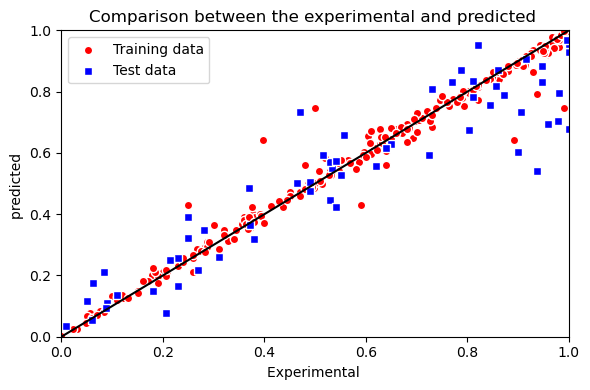

In [3]:
X_train,X_test= train_test_split(X, test_size=0.2,random_state = 6)
y_train,y_test = train_test_split(y, test_size=0.2,random_state = 6)

#print('X_train shape',X_train.shape,'X_test. shape',X_test.shape)
#print('y_train shape',y_train.shape,'y_test shape',y_test.shape)

from sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=148,max_depth=5,random_state=0)
model.fit(X_train_std, y_train)
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)
score=r2_score(y_test,y_test_pred)
#y_train_pred = model.predict(X_train_std) #预测训练集
#y_test_pred= model.predict(X_test_std)   #预测测试集
MSE_train = mean_squared_error(y_train,y_train_pred) 
MSE_test = mean_squared_error(y_test,y_test_pred)
MAE_train = mean_absolute_error(y_train,y_train_pred) 
MAE_test= mean_absolute_error(y_test,y_test_pred)
print('MSE_train:',MSE_train,'\n','MSE_test',MSE_test) 
print('MAE_train:',MAE_train,'\n','MAE_test',MAE_test)
print("R^2_train:",r2_score(y_train,y_train_pred),'\n',"R^2_test1:",r2_score(y_test,y_test_pred))
#真实值预测值平面散点图
plt.figure(figsize=(6,4)) # 指定图片的尺寸
plt.scatter(y_train,y_train_pred,color='red',marker='o',edgecolor='white',label ='Training data') #残差散点图，指定散点的颜色，标记(o为圆圈s为方块)，标签等设定
plt.scatter(y_test,y_test_pred,color='blue',marker='s',edgecolor='white',label ='Test data')
plt.ylabel('predicted ')
plt.xlabel('Experimental ')
plt.title('Comparison between the experimental and predicted ')
plt.legend(loc = 'upper left') #图例位置
plt.plot([0, 1], [0, 1],c='black')
plt.xlim([0,1]) # 设定x轴范围
plt.ylim(0,1)
plt.tight_layout() #自动调整子图参数，使之填充整个图像区域，可用于检查坐标轴标签、刻度标签以及标题的部分
#plt.savefig("C:\Users\Administrator\Desktop\test\ILCO2_SVM_pred.png")     #图片保存
plt.show()

In [7]:
test=pd.read_csv('460E.csv')
XTEST=test.iloc[:,0:60]
XTEST=XTEST.values
#sc = StandardScaler()
XTEST = sc.transform(XTEST)
ypre=model.predict(XTEST)
test['pregbr']=pd.DataFrame(ypre)
#ypre=pd.DataFrame(ypre)
test.to_csv('460E.csv')

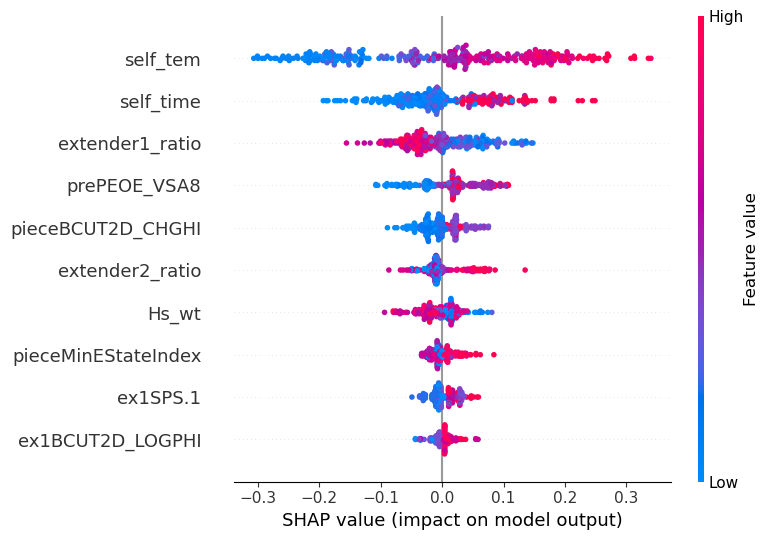

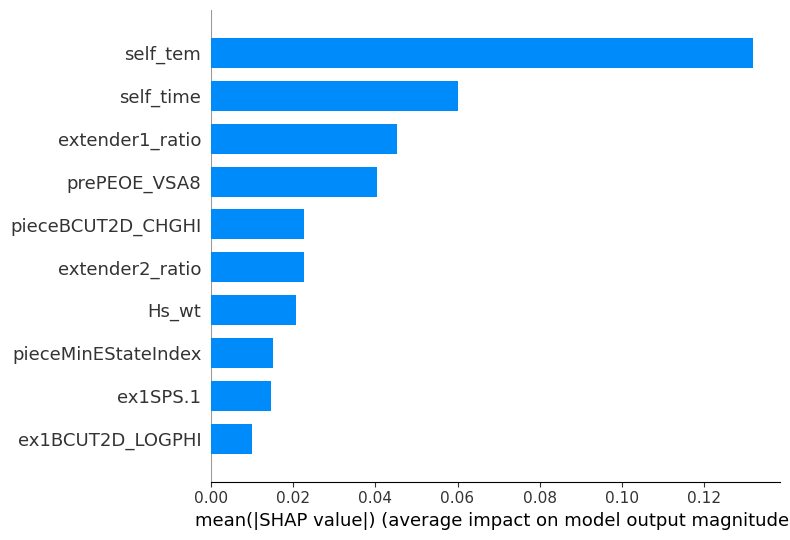

In [4]:
sc = StandardScaler()
X= sc.fit_transform(X)
X1=df.iloc[:,0:60]
X=pd.DataFrame(X,columns=X1.columns)
import shap
import json 
shap.initjs()
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.summary_plot(shap_values, X,max_display=10)
shap.summary_plot(shap_values, X,max_display=10, 
                  plot_type="bar")


In [13]:
from sklearn import plot_partial_dependence
features = [5]

# 绘制PDP图
fig, ax = plt.subplots(figsize=(8, 4))
plot_partial_dependence(model, X, features, ax=ax, grid_resolution=50)
plt.title('Partial Dependence Plot')
plt.xlabel('Feature Value')
plt.ylabel('Partial Dependence')
plt.tight_layout()
plt.show()

ImportError: cannot import name 'plot_partial_dependence' from 'sklearn' (E:\ana\envs\pu\lib\site-packages\sklearn\__init__.py)

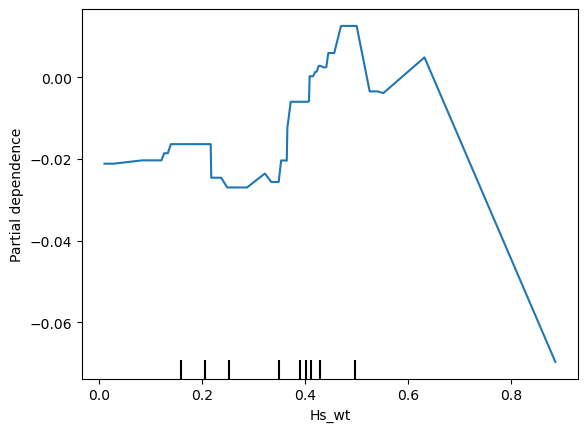

In [32]:
from sklearn.inspection import PartialDependenceDisplay
X=df.iloc[:,0:60]
features = ['Hs_wt']  # 替换为你要绘制的特征
PartialDependenceDisplay.from_estimator(model, X, features,kind='average',response_method="auto")
plt.show()
#这里都是通过sklearn的PartialDependenceDisplay进行实现，除了这个实现方法，还可以通过shap、pdpbox实现，X轴：表示选择研究的特征的取值范围，Y轴表示模型的预测结果


MSE_train: 0.007294219764950541 
 MSE_test 0.01676625744787767
MAE_train: 0.06096917829937592 
 MAE_test 0.09515260231560874
R^2_train: 0.9182001944288748 
 R^2_test1: 0.8283347767140173


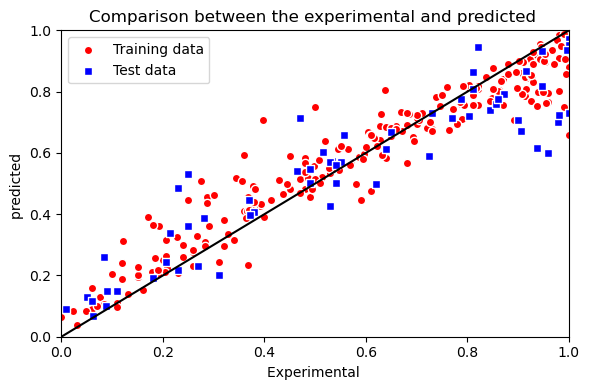

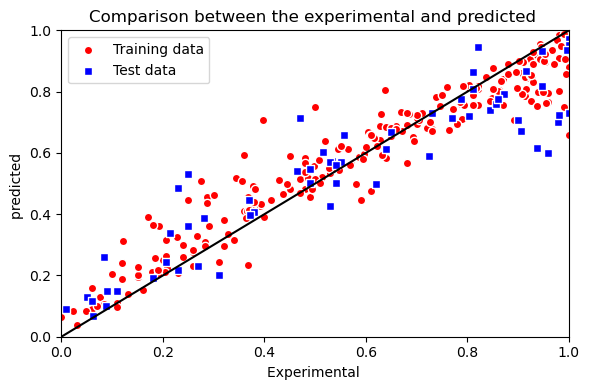

In [7]:
X_train,X_test= train_test_split(X, test_size=0.2,random_state = 6)
y_train,y_test = train_test_split(y, test_size=0.2,random_state = 6)

#print('X_train shape',X_train.shape,'X_test. shape',X_test.shape)
#print('y_train shape',y_train.shape,'y_test shape',y_test.shape)

from sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_features=31,n_estimators=20,max_depth=11,random_state=0,n_jobs=-1)
model.fit(X_train_std,y_train)
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)
score=r2_score(y_test,y_test_pred)
y_train_pred = model.predict(X_train_std) #预测训练集
y_test_pred= model.predict(X_test_std)   #预测测试集
MSE_train = mean_squared_error(y_train,y_train_pred) 
MSE_test = mean_squared_error(y_test,y_test_pred)
MAE_train = mean_absolute_error(y_train,y_train_pred) 
MAE_test= mean_absolute_error(y_test,y_test_pred)
print('MSE_train:',MSE_train,'\n','MSE_test',MSE_test) 
print('MAE_train:',MAE_train,'\n','MAE_test',MAE_test)
print("R^2_train:",r2_score(y_train,y_train_pred),'\n',"R^2_test1:",r2_score(y_test,y_test_pred))

plt.figure(figsize=(6,4)) # 指定图片的尺寸
plt.scatter(y_train,y_train_pred,color='red',marker='o',edgecolor='white',label ='Training data') #残差散点图，指定散点的颜色，标记(o为圆圈s为方块)，标签等设定
plt.scatter(y_test,y_test_pred,color='blue',marker='s',edgecolor='white',label ='Test data')
plt.ylabel('predicted ')
plt.xlabel('Experimental ')
plt.title('Comparison between the experimental and predicted ')
plt.legend(loc = 'upper left') #图例位置
plt.plot([0, 1], [0, 1],c='black')
plt.xlim([0,1]) # 设定x轴范围
plt.ylim(0,1)
plt.tight_layout() #自动调整子图参数，使之填充整个图像区域，可用于检查坐标轴标签、刻度标签以及标题的部分
#plt.savefig("C:\Users\Administrator\Desktop\test\ILCO2_SVM_pred.png")     #图片保存
plt.show()
plt.figure(figsize=(6,4)) # 指定图片的尺寸
plt.scatter(y_train,y_train_pred,color='red',marker='o',edgecolor='white',label ='Training data') #残差散点图，指定散点的颜色，标记(o为圆圈s为方块)，标签等设定
plt.scatter(y_test,y_test_pred,color='blue',marker='s',edgecolor='white',label ='Test data')
plt.ylabel('predicted ')
plt.xlabel('Experimental ')
plt.title('Comparison between the experimental and predicted ')
plt.legend(loc = 'upper left') #图例位置
plt.plot([0, 1], [0, 1],c='black')
plt.xlim([0,1]) # 设定x轴范围
plt.ylim(0,1)
plt.tight_layout() #自动调整子图参数，使之填充整个图像区域，可用于检查坐标轴标签、刻度标签以及标题的部分
#plt.savefig("C:\Users\Administrator\Desktop\test\ILCO2_SVM_pred.png")     #图片保存
plt.show()

MSE_train: 0.001942825441445406 
 MSE_test 0.02213840437988184
MAE_train: 0.015576196972839506 
 MAE_test 0.10934074553770491
R^2_train: 0.9782125095637357 
 R^2_test1: 0.7733308018869256


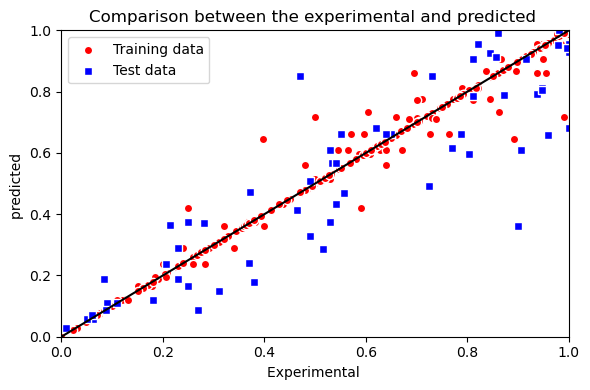

In [8]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=10,random_state=3)
model.fit(X_train_std,y_train)
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)
score=r2_score(y_test,y_test_pred)
y_train_pred = model.predict(X_train_std) #预测训练集
y_test_pred= model.predict(X_test_std)   #预测测试集
MSE_train = mean_squared_error(y_train,y_train_pred) 
MSE_test = mean_squared_error(y_test,y_test_pred)
MAE_train = mean_absolute_error(y_train,y_train_pred) 
MAE_test= mean_absolute_error(y_test,y_test_pred)
print('MSE_train:',MSE_train,'\n','MSE_test',MSE_test) 
print('MAE_train:',MAE_train,'\n','MAE_test',MAE_test)
print("R^2_train:",r2_score(y_train,y_train_pred),'\n',"R^2_test1:",r2_score(y_test,y_test_pred))
plt.figure(figsize=(6,4)) # 指定图片的尺寸
plt.scatter(y_train,y_train_pred,color='red',marker='o',edgecolor='white',label ='Training data') #残差散点图，指定散点的颜色，标记(o为圆圈s为方块)，标签等设定
plt.scatter(y_test,y_test_pred,color='blue',marker='s',edgecolor='white',label ='Test data')
plt.ylabel('predicted ')
plt.xlabel('Experimental ')
plt.title('Comparison between the experimental and predicted ')
plt.legend(loc = 'upper left') #图例位置
plt.plot([0, 1], [0, 1],c='black')
plt.xlim([0,1]) # 设定x轴范围
plt.ylim(0,1)
plt.tight_layout() #自动调整子图参数，使之填充整个图像区域，可用于检查坐标轴标签、刻度标签以及标题的部分
#plt.savefig("C:\Users\Administrator\Desktop\test\ILCO2_SVM_pred.png")     #图片保存
plt.show()

X_train shape (243, 60) X_test. shape (61, 60)
y_train shape (243,) y_test shape (61,)
Epoch 1/916
9/9 [==============================] - 0s 15ms/step - loss: 0.1489 - val_loss: 0.0975
Epoch 2/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0772 - val_loss: 0.0698
Epoch 3/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0715 - val_loss: 0.0656
Epoch 4/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0652 - val_loss: 0.0655
Epoch 5/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0597 - val_loss: 0.0641
Epoch 6/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0591 - val_loss: 0.0611
Epoch 7/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0540 - val_loss: 0.0566
Epoch 8/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0509 - val_loss: 0.0533
Epoch 9/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0497 - val_loss: 0.0601
Epoch 10/916
9/9 [=====================

Epoch 84/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0242 - val_loss: 0.0300
Epoch 85/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0241 - val_loss: 0.0301
Epoch 86/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0231 - val_loss: 0.0286
Epoch 87/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0237 - val_loss: 0.0334
Epoch 88/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0280 - val_loss: 0.0324
Epoch 89/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0324 - val_loss: 0.0438
Epoch 90/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0301 - val_loss: 0.0513
Epoch 91/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0324 - val_loss: 0.0431
Epoch 92/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0300 - val_loss: 0.0433
Epoch 93/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0300 - val_loss: 0.0310
Epoch 94/916
9/9 [==

Epoch 167/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0205 - val_loss: 0.0253
Epoch 168/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0211 - val_loss: 0.0264
Epoch 169/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0230 - val_loss: 0.0249
Epoch 170/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0211 - val_loss: 0.0263
Epoch 171/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0204 - val_loss: 0.0243
Epoch 172/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0222 - val_loss: 0.0261
Epoch 173/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0196 - val_loss: 0.0254
Epoch 174/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0200 - val_loss: 0.0259
Epoch 175/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0198 - val_loss: 0.0250
Epoch 176/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0202 - val_loss: 0.0306
Epoch 177/

Epoch 332/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0235 - val_loss: 0.0251
Epoch 333/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0196 - val_loss: 0.0245
Epoch 334/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0191 - val_loss: 0.0331
Epoch 335/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0210 - val_loss: 0.0232
Epoch 336/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0172 - val_loss: 0.0243
Epoch 337/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.0258
Epoch 338/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 0.0242
Epoch 339/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0176 - val_loss: 0.0255
Epoch 340/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0167 - val_loss: 0.0244
Epoch 341/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0169 - val_loss: 0.0238
Epoch 342/

Epoch 497/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0151 - val_loss: 0.0200
Epoch 498/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 0.0262
Epoch 499/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0178 - val_loss: 0.0205
Epoch 500/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0161 - val_loss: 0.0232
Epoch 501/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0163 - val_loss: 0.0196
Epoch 502/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0170 - val_loss: 0.0232
Epoch 503/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0155 - val_loss: 0.0206
Epoch 504/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0153 - val_loss: 0.0230
Epoch 505/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0161 - val_loss: 0.0233
Epoch 506/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0194 - val_loss: 0.0212
Epoch 507/

Epoch 662/916
9/9 [==============================] - 0s 5ms/step - loss: 0.0148 - val_loss: 0.0195
Epoch 663/916
9/9 [==============================] - 0s 5ms/step - loss: 0.0161 - val_loss: 0.0275
Epoch 664/916
9/9 [==============================] - 0s 4ms/step - loss: 0.0177 - val_loss: 0.0205
Epoch 665/916
9/9 [==============================] - 0s 4ms/step - loss: 0.0148 - val_loss: 0.0206
Epoch 666/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0140 - val_loss: 0.0201
Epoch 667/916
9/9 [==============================] - 0s 4ms/step - loss: 0.0133 - val_loss: 0.0198
Epoch 668/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0137 - val_loss: 0.0186
Epoch 669/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0137 - val_loss: 0.0199
Epoch 670/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0131 - val_loss: 0.0189
Epoch 671/916
9/9 [==============================] - 0s 4ms/step - loss: 0.0142 - val_loss: 0.0211
Epoch 672/

Epoch 827/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0150 - val_loss: 0.0171
Epoch 828/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0140 - val_loss: 0.0190
Epoch 829/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0152 - val_loss: 0.0171
Epoch 830/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.0191
Epoch 831/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0123 - val_loss: 0.0166
Epoch 832/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0146 - val_loss: 0.0189
Epoch 833/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0146 - val_loss: 0.0234
Epoch 834/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0169 - val_loss: 0.0174
Epoch 835/916
9/9 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.0179
Epoch 836/916
9/9 [==============================] - 0s 4ms/step - loss: 0.0132 - val_loss: 0.0185
Epoch 837/

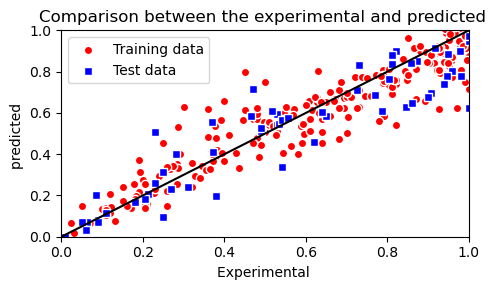

In [9]:
#y=y.values.ravel()
X_train,X_test= train_test_split(X, test_size=0.2,random_state = 6)
y_train,y_test = train_test_split(y, test_size=0.2,random_state = 6)

print('X_train shape',X_train.shape,'X_test. shape',X_test.shape)
print('y_train shape',y_train.shape,'y_test shape',y_test.shape)
from sklearn.preprocessing  import MinMaxScaler
mm1=MinMaxScaler()
X_train_std=mm1.fit_transform(X_train) #使用fit方法训练标准化变化器,然后用transform方法实行标准化.可使用fit_transform将训练和标准化同时进行，然后将标准化后的X_train用X_train_std来表示
X_test_std=mm1.transform(X_test)
#ANN
import tensorflow as tf
from keras.models import Model
from tensorflow.python.keras.layers.core import Dense,Flatten
from keras import optimizers
from keras.models import Sequential
from keras import models
from keras import layers
import tensorflow as tf#pip install tensorflow
import random
import random
random.seed(0)
np.random.seed(0)#固定随机数
tf.random.set_seed(0)

input1 = tf.keras.layers.Input(shape=[60], name="input")
XR1=tf.keras.layers.Dense(32,activation='relu')(input1)
XR2=tf.keras.layers.Dense(8,activation='relu')(XR1)
#XR3=tf.keras.layers.Dense(c,activation='relu')(XR2)
output=tf.keras.layers.Dense(1,activation='relu')(XR2)


model = tf.keras.models.Model(inputs=[input1],
                           outputs=[output])

model.compile(loss="mse", optimizer=optimizers.Adam(learning_rate=0.004))

history = model.fit(X_train_std, y_train, epochs=916,
                    validation_data=(X_test_std, y_test),batch_size=28)
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)
score_train=r2_score(y_train,y_train_pred)
score_test=r2_score(y_test,y_test_pred)
print(score_train)
print(score_test)
#真实值预测值平面散点图
plt.figure(figsize=(5,3)) # 指定图片的尺寸
plt.scatter(y_train,y_train_pred,color='red',marker='o',edgecolor='white',label ='Training data') #残差散点图，指定散点的颜色，标记(o为圆圈s为方块)，标签等设定
plt.scatter(y_test,y_test_pred,color='blue',marker='s',edgecolor='white',label ='Test data')
plt.ylabel('predicted ')
plt.xlabel('Experimental ')
plt.title('Comparison between the experimental and predicted ')
plt.legend(loc = 'upper left') #图例位置
plt.plot([0, 1], [0, 1],c='black')
plt.xlim([0,1]) # 设定x轴范围
plt.ylim(0,1)
plt.tight_layout() #自动调整子图参数，使之填充整个图像区域，可用于检查坐标轴标签、刻度标签以及标题的部分
#plt.savefig("C:\Users\Administrator\Desktop\test\ILCO2_SVM_pred.png")     #图片保存
plt.show()

(0.0, 1.1)

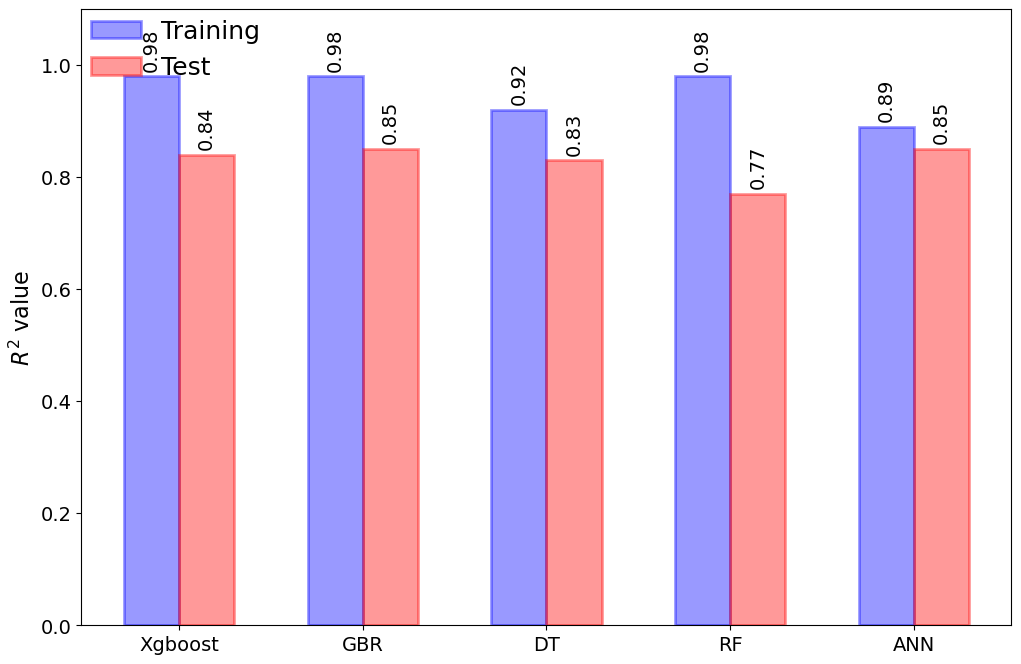

In [3]:
methods = ['Xgboost', 'GBR', 'DT', 'RF', 'ANN']
use_method = ['{}'.format(m) for m in methods ]

r2_trn = [0.98,0.98,0.92,0.98,0.89]
r2_tes = [0.84,0.85,0.83,0.77,0.85]

width =0.3
plt.figure(facecolor='white', figsize=(12,8))
ind = np.arange(len(methods))
plt.bar(ind, r2_trn, width, color='blue', alpha=0.4, edgecolor='blue', linewidth=2, label = 'Training')
plt.bar(ind+width, r2_tes, width, color='red', alpha=0.4, edgecolor='red', linewidth=2, label = 'Test')

for x,y in zip(ind, r2_trn):
    plt.text(x, y+0.01, '%.2f' % y, ha='center', va= 'bottom', rotation=90, fontsize=14)

for x,y in zip(ind, r2_tes):
    plt.text(x+ width, y+0.01, '%.2f' % y, ha='center', va= 'bottom', rotation=90, fontsize=14)

plt.xticks(ind+(width*0.5), methods, fontsize=14)
#plt.tick_params(length=0)
plt.yticks(fontsize=14)
plt.ylabel('$R^{2}$ value', fontsize=16)
#plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10)
plt.legend(bbox_to_anchor=(0, 1),loc='upper left', borderaxespad=0, fontsize=18, frameon=False)
plt.ylim(0, 1.1)
#plt.savefig(f'{PATH}/{date}_{Reaction}_ML_methods_prop{add_model}_R2_v2.png', dpi=600, bbox_inches='tight')